In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='Ant-v4'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df = pd.DataFrame()
for i in range(1,6):
  path ='data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df = pd.concat([df,aux])
df = df.set_index(["Trial"])
print(df.shape)

(1523, 15)


In [5]:
df.head(15)

,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep
Trial,,,,,,,,,,,,,,,
1,1,Ant-v4,18-05-2023 17:33:53,200,201,0,0.009941,1,201,False,-8.979827,-8.979827,-8.979827,-8.979827,-8.979827
1,2,Ant-v4,18-05-2023 17:34:05,400,401,0,0.019882,1,401,False,-114.851950,-61.915888,-61.915888,-61.915888,-61.915888
1,3,Ant-v4,18-05-2023 17:34:16,600,601,0,0.029822,1,601,False,-287.674716,-137.168831,-137.168831,-137.168831,-137.168831
1,4,Ant-v4,18-05-2023 17:34:27,800,801,0,0.039763,1,801,False,-387.605469,-199.777990,-199.777990,-199.777990,-199.777990
1,5,Ant-v4,18-05-2023 17:34:39,1000,1001,0,0.049704,1,1001,False,-675.882698,-294.998932,-294.998932,-294.998932,-294.998932
1,6,Ant-v4,18-05-2023 17:34:50,1200,1201,0,0.059645,1,1201,False,-1257.363414,-455.393012,-455.393012,-455.393012,-455.393012
1,7,Ant-v4,18-05-2023 17:35:01,1400,1401,0,0.069586,1,1401,False,-1494.488638,-603.835245,-603.835245,-603.835245,-603.835245
1,8,Ant-v4,18-05-2023 17:35:12,1600,1601,0,0.079526,1,1601,False,-1821.275286,-756.015250,-756.015250,-756.015250,-756.015250
1,9,Ant-v4,18-05-2023 17:35:23,1800,1801,0,0.089467,1,1801,False,-1675.775559,-858.210840,-858.210840,-858.210840,-858.210840


In [6]:
df.tail(15)

,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep
Trial,,,,,,,,,,,,,,,
5,238,Ant-v4,10-06-2023 10:15:13,47400,47401,0,0.999,2,42145,False,-4865.752758,-5081.268163,-6044.587019,-6011.000759,-5100.347533
5,239,Ant-v4,10-06-2023 10:15:49,47600,47601,0,0.999,2,42345,False,-4846.881844,-5080.287467,-6030.298109,-5979.928165,-5051.996443
5,240,Ant-v4,10-06-2023 10:16:26,47800,47801,0,0.999,2,42545,False,-4926.516907,-5079.646756,-6018.043843,-5942.314779,-5017.976443
5,241,Ant-v4,10-06-2023 10:17:03,48000,48001,0,0.999,2,42745,False,-4890.061675,-5078.860096,-6005.552117,-5901.518138,-4986.530337
5,242,Ant-v4,10-06-2023 10:17:40,48200,48201,0,0.999,2,42945,False,-4891.418177,-5078.085543,-5992.604895,-5859.774264,-4959.656352
5,243,Ant-v4,10-06-2023 10:18:17,48400,48401,0,0.999,2,43145,False,-5093.239805,-5078.147906,-5979.923763,-5821.598915,-4964.169111
5,244,Ant-v4,10-06-2023 10:18:54,48600,48601,0,0.999,2,43345,False,-5183.975264,-5078.581625,-5968.953117,-5787.153080,-4970.450343
5,245,Ant-v4,10-06-2023 10:19:31,48800,48801,0,0.999,2,43545,False,-5161.664497,-5078.920738,-5957.691444,-5753.800329,-4979.280216
5,246,Ant-v4,10-06-2023 10:20:08,49000,49001,0,0.999,2,43745,False,-5144.813761,-5079.188596,-5947.015314,-5722.476127,-4993.072500


<Axes: xlabel='TotalItr', ylabel='EpRew'>

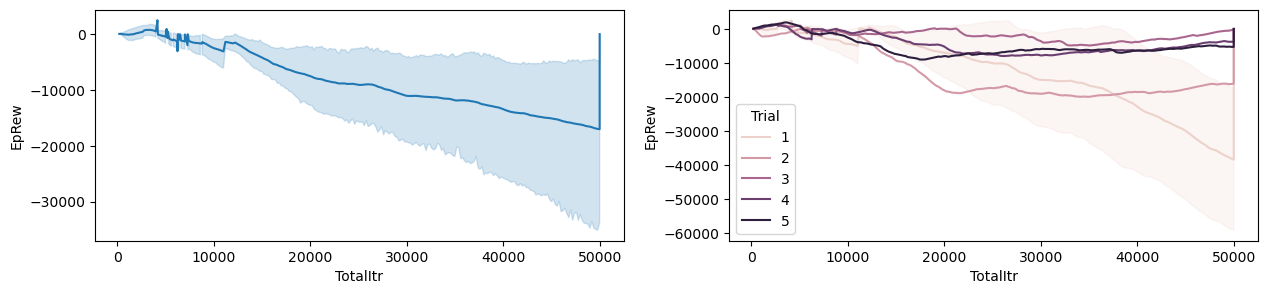

In [7]:
fig, axs = plt.subplots(ncols=2)
fig.set_figwidth(15)
fig.set_figheight(3)
sns.lineplot(data=df, x="TotalItr", y="EpRew",ax=axs[0])
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue="Trial",ax=axs[1])



<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

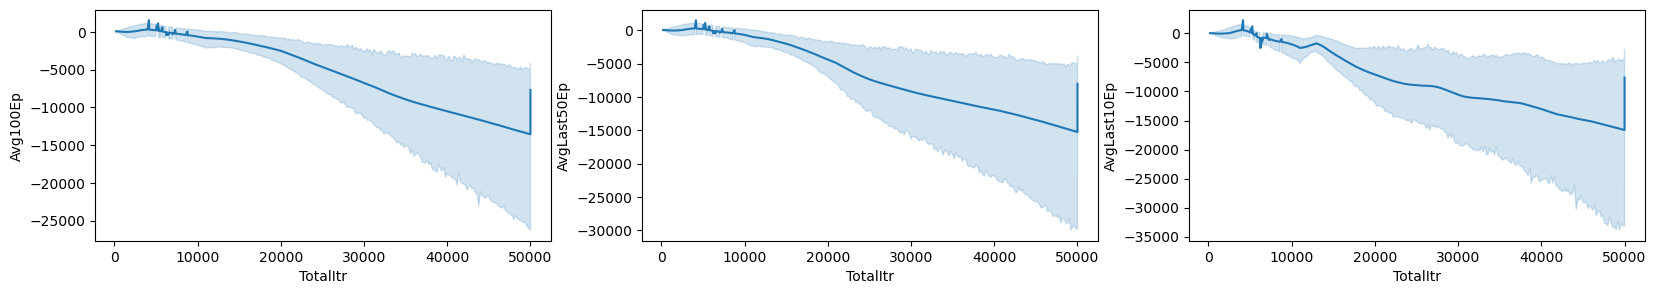

In [8]:
fig, axs = plt.subplots(ncols=3)
fig.set_figwidth(20)
fig.set_figheight(3)
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",ax=axs[0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",ax=axs[1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",ax=axs[2])